### With Tensorflow Keras

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,  Conv2D, MaxPool2D, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

2024-07-19 09:22:40.237006: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 09:22:40.237130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 09:22:40.345681: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
LABELS = {
    0 : "airplane",
    1 : "automobile",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck",
}


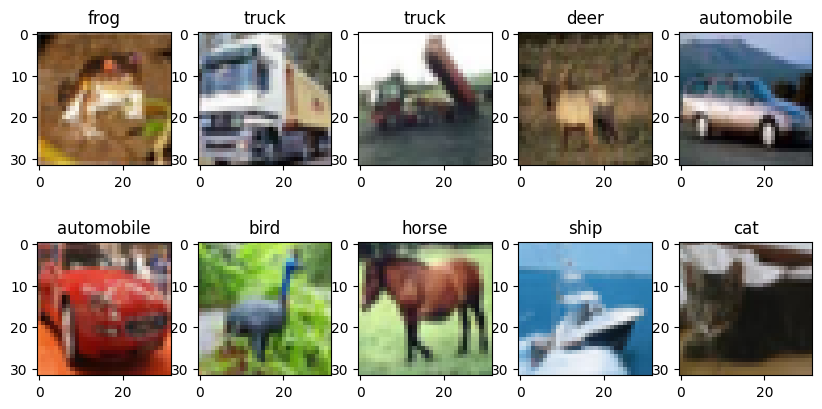

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(10,5))
idx = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[idx])
        ax[i,j].set_title(LABELS[y_train[idx][0]])
        idx += 1
plt.show()

In [5]:
x_train = x_train / 225. 
x_test = x_test / 225.

In [6]:
x_train.dtype

dtype('float64')

In [7]:
model = Sequential([
    tf.keras.Input((32, 32,3)),
    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.2),
    
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(10, activation="softmax")
    
])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,112,202 (4.24 MB)

 Trainable params: 1,111,114 (4.24 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [9]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=20)

Epoch 1/20
  41/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1506 - loss: 2.7571

I0000 00:00:1721380995.151272      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721380995.172453      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3574 - loss: 1.8520

W0000 00:00:1721381009.196044      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1721381010.267643      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.3574 - loss: 1.8518 - val_accuracy: 0.4312 - val_loss: 1.6632
Epoch 2/20
  39/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5413 - loss: 1.2948

W0000 00:00:1721381010.974251      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5645 - loss: 1.2353 - val_accuracy: 0.5968 - val_loss: 1.1798
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6245 - loss: 1.0735 - val_accuracy: 0.6386 - val_loss: 0.9956
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6574 - loss: 0.9871 - val_accuracy: 0.6912 - val_loss: 0.8849
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6856 - loss: 0.9194 - val_accuracy: 0.6832 - val_loss: 0.8931
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7090 - loss: 0.8481 - val_accuracy: 0.5926 - val_loss: 1.2146
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7236 - loss: 0.8101 - val_accuracy: 0.6690 - val_loss: 0.9719
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7409 - loss: 0.7533 - val_accuracy: 0.7346 - val_loss: 0.7684
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7549 - loss: 0.7053 - val_accurac

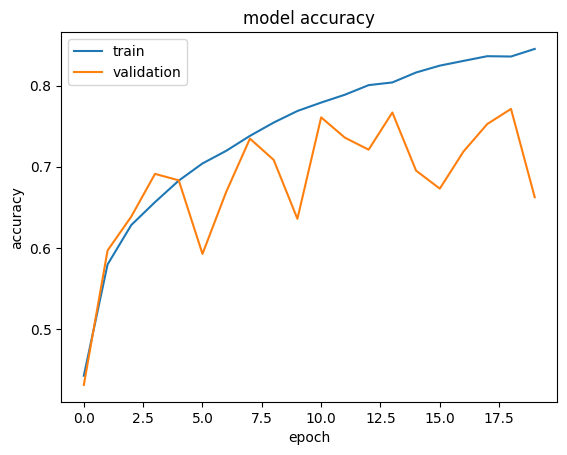

In [11]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



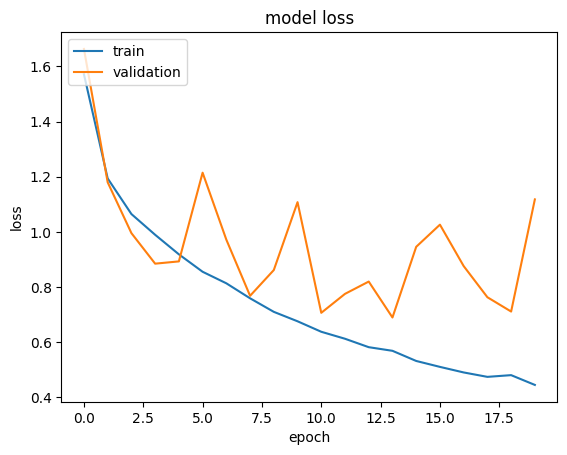

In [12]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy : {acc}\nLoss : {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6484 - loss: 1.1438
Accuracy : 0.6510999798774719
Loss : 1.1425039768218994


W0000 00:00:1721381113.113154      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [14]:
model.save("tf_model.h5")

### With Pytorch

In [15]:
import os
import torch
from torch import nn
import torchvision
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as datasets
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

In [16]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [17]:
normalize_transform = torchvision.transforms.Compose([ 
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5),  
                                     std = (0.5, 0.5, 0.5))]) 
  

train_dataset = torchvision.datasets.CIFAR10( 
    root="./CIFAR10/train", train=True, 
    transform=normalize_transform, 
    download=True) 
    
test_dataset = torchvision.datasets.CIFAR10( 
    root="./CIFAR10/test", train=False, 
    transform=normalize_transform, 
    download=True) 

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size) 
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size) 

100%|██████████| 170498071/170498071 [00:02<00:00, 77003394.06it/s]


Extracting ./CIFAR10/train/cifar-10-python.tar.gz to ./CIFAR10/train


100%|██████████| 170498071/170498071 [00:02<00:00, 62490479.78it/s]


Extracting ./CIFAR10/test/cifar-10-python.tar.gz to ./CIFAR10/test


In [18]:
class NNet(torch.nn.Module): 
	def __init__(self): 
		super().__init__() 
		self.model = torch.nn.Sequential( 
			#Input = 3 x 32 x 32, Output = 32 x 32 x 32 
			torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1), 
			torch.nn.ReLU(), 
			torch.nn.BatchNorm2d(32), 
			#Input = 32 x 32 x 32, Output = 32 x 16 x 16 
			torch.nn.MaxPool2d(kernel_size=2), 

			#Input = 32 x 16 x 16, Output = 64 x 16 x 16 
			torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1), 
			torch.nn.ReLU(), 
			torch.nn.BatchNorm2d(64),  
			#Input = 64 x 16 x 16, Output = 64 x 8 x 8 
			torch.nn.MaxPool2d(kernel_size=2), 
			
			#Input = 64 x 8 x 8, Output = 128 x 8 x 8  
			torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1), 
			torch.nn.ReLU(), 
			torch.nn.BatchNorm2d(64), 
			#Input = 128 x 8 x 8, Output = 128 x 4 x 4  
			torch.nn.MaxPool2d(kernel_size=2), 

			torch.nn.Flatten(), 
			torch.nn.Linear(64*4*4, 1024),  
			torch.nn.ReLU(), 
			torch.nn.Dropout(0.5),  
            
            torch.nn.Linear(1024, 512), 
			torch.nn.ReLU(), 
            torch.nn.Dropout(0.5), 
            
            torch.nn.Linear(512, 100), 
			torch.nn.ReLU(), 

            nn.Linear(100, 10),
            
		) 

	def forward(self, x): 
		return self.model(x) 

In [19]:
model = NNet().to(device)


In [20]:
num_epochs = 50
learning_rate = 0.01   
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay) 

In [21]:
def accuracy(loader):
    test_acc=0
    model.eval() 

    with torch.no_grad(): 
        for i, (images, labels) in enumerate(loader): 

            images = images.to(device) 
            y_true = labels.to(device) 

            outputs = model(images) 

            _, y_pred = torch.max(outputs.data, 1) 

            test_acc += (y_pred == y_true).sum().item() 

        return test_acc / len(loader)

In [22]:
train_loss_list = []
train_accuracy_list = []

In [23]:
for epoch in range(num_epochs):    
    
    train_loss = 0
    model.train()
    
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss_list.append(train_loss/len(train_loader))
    train_accuracy_list.append(accuracy(train_loader))
    
    print(f"Epoch {epoch+1}/{num_epochs}\tLoss : {train_loss_list[-1]}\tAccuracy : {train_accuracy_list[-1]}")

Epoch 1/50	Loss : 1.8944476245309385	Accuracy : 34.30179028132992
Epoch 2/50	Loss : 1.754568064304264	Accuracy : 39.70843989769821
Epoch 3/50	Loss : 1.7023903332707826	Accuracy : 43.39897698209719
Epoch 4/50	Loss : 1.6697534609328755	Accuracy : 46.85677749360614
Epoch 5/50	Loss : 1.6577927377217871	Accuracy : 45.18414322250639
Epoch 6/50	Loss : 1.6372164981749358	Accuracy : 39.86700767263427
Epoch 7/50	Loss : 1.6357884144843997	Accuracy : 40.43478260869565
Epoch 8/50	Loss : 1.6255855606035199	Accuracy : 39.9386189258312
Epoch 9/50	Loss : 1.6197898579985284	Accuracy : 48.250639386189256
Epoch 10/50	Loss : 1.6178754089433518	Accuracy : 44.769820971867006
Epoch 11/50	Loss : 1.6122879097833658	Accuracy : 50.846547314578004
Epoch 12/50	Loss : 1.6088225762252613	Accuracy : 47.846547314578004
Epoch 13/50	Loss : 1.6024383071743313	Accuracy : 44.68286445012788
Epoch 14/50	Loss : 1.6041008093777824	Accuracy : 43.670076726342714
Epoch 15/50	Loss : 1.6040937022479904	Accuracy : 41.32225063938619
E

In [24]:
test_accuracy = accuracy(test_loader)
print(f"Test accuracy : {test_accuracy}")

Test accuracy : 54.063291139240505


In [25]:
torch.save(model.state_dict(), "torch_model.pth")